## Bài tập 1: (Data Analysis) hãy hoàn thiện chương trình sau sử dụng thư viện seaborn để hiện thị mối quan hệ giữa độ tuổi và khả năng bị bệnh tim. Ở đây, target = 1 ngụ ý rằng người đó đang bị bệnh tim và target = 0 ngụ ý rằng người đó không bị bệnh tim. Hình 3 thể hiện kết quả sau khi thực hiện đoạn code visualization bên dưới:

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


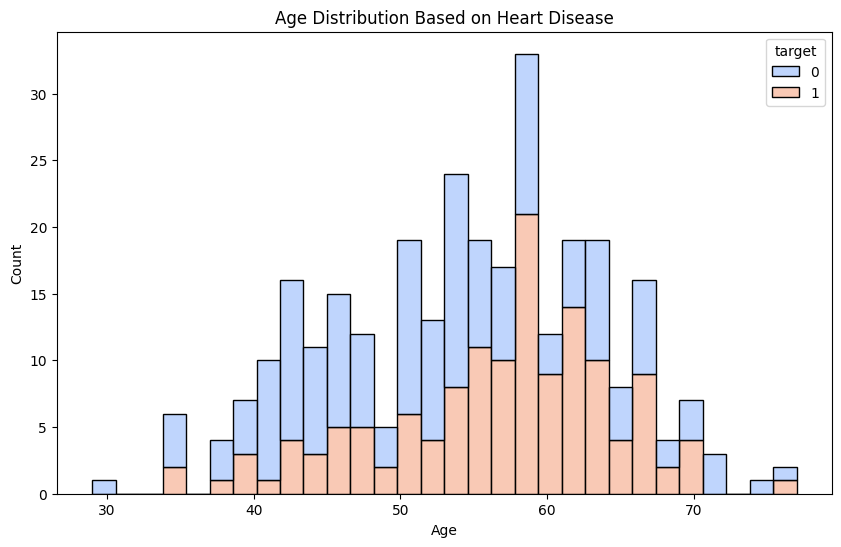

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Bai tap 1
df = pd.read_csv('/content/cleveland.csv', header=None)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang',
              'oldpeak', 'slope', 'ca', 'thal', 'target']

# Ngụ ý rằng tất cả giá trị target khác 0 đều ngụ ý bị bệnh tim
df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})

# Điền giá trị NaN với giá trị trung bình của cột
df['thal'] = df.thal.fillna(df.thal.mean())
df['ca'] = df.ca.fillna(df.ca.mean())

# Trực quan hóa phân bố của target vs age
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='target', multiple='stack', palette='coolwarm', bins=30)
plt.title('Age Distribution Based on Heart Disease')
plt.xlabel('Age')
plt.ylabel('Count')

plt.show()

## Bài tập 2: (Data Analysis) hãy hoàn thiện chương trình sau sử dụng thư viện seaborn để hiện thị mối quan hệ giữa độ tuổi, giới tính và khả năng bị bệnh tim. Hình 4 thể hiện kết quả sau khi thực hiện đoạn code visualization bên dưới:

<ipython-input-3-8e23dee8e1ff>:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='age', y='sex', hue='target', ci=None, palette='coolwarm', estimator=lambda x: len(x) / len(df) * 100)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


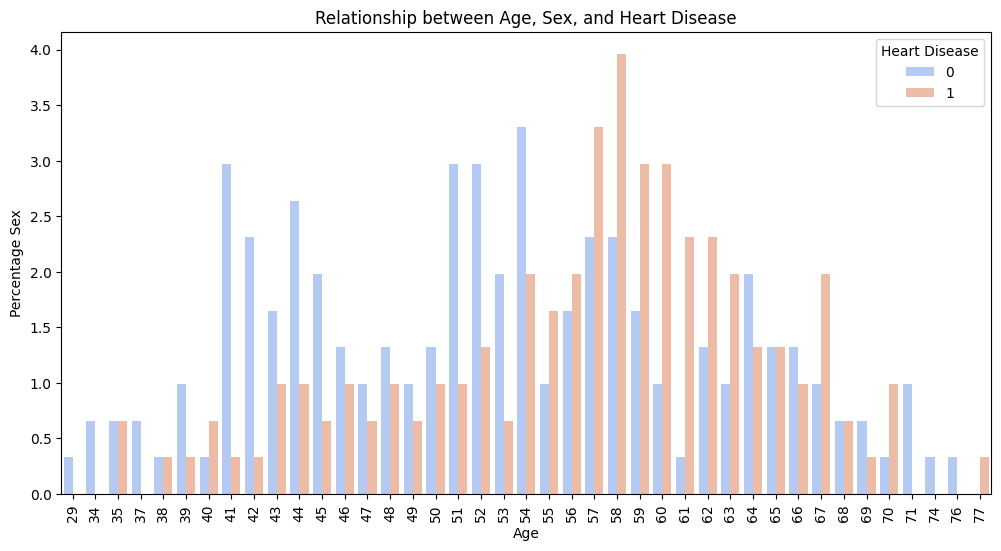

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Đọc và chuẩn bị dữ liệu
df = pd.read_csv('/content/cleveland.csv', header=None)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang',
              'oldpeak', 'slope', 'ca', 'thal', 'target']

# Bản đồ mục tiêu
df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})

# Điền giá trị NaN
df['thal'] = df.thal.fillna(df.thal.mean())
df['ca'] = df.ca.fillna(df.ca.mean())

# Biểu đồ cột giữa độ tuổi và giới tính với hue là target
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='age', y='sex', hue='target', ci=None, palette='coolwarm', estimator=lambda x: len(x) / len(df) * 100)

plt.title('Relationship between Age, Sex, and Heart Disease')
plt.xlabel('Age')
plt.ylabel('Percentage Sex')
plt.xticks(rotation=90)
plt.legend(title='Heart Disease')

plt.show()

## Bài tập 3: (sử dụng KNN cho dự đoán bệnh tim) hãy hoàn thiện chương trình sau sử dụng giải thuật KNN để dự đoán bệnh nhân có khả bị bệnh tim hay không sử dụng các tham số sau: n_neighbors=5,weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, metric=’minkowski’

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer

# Đọc dữ liệu từ tệp csv
df = pd.read_csv('cleveland.csv', header=None)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang',
              'oldpeak', 'slope', 'ca', 'thal', 'target']

# Bản đồ mục tiêu
df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})

# X và y
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Xử lý giá trị NaN bằng SimpleImputer
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Chia dữ liệu thành train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo và huấn luyện mô hình KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

# Huấn luyện mô hình
knn.fit(X_train, y_train)

# Dự đoán trên tập huấn luyện và kiểm tra
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Tính toán ma trận nhầm lẫn cho cả tập huấn luyện và kiểm tra
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# In ra kết quả
print("Confusion Matrix for Training Set:\n", cm_train)
print("Confusion Matrix for Test Set:\n", cm_test)

# Tính độ chính xác cho tập huấn luyện và kiểm tra
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

print('Accuracy for training set for KNeighborsClassifier = {}'.format(accuracy_for_train))
print('Accuracy for test set for KNeighborsClassifier = {}'.format(accuracy_for_test))

Confusion Matrix for Training Set:
 [[107  28]
 [ 31  76]]
Confusion Matrix for Test Set:
 [[22  7]
 [12 20]]
Accuracy for training set for KNeighborsClassifier = 0.76
Accuracy for test set for KNeighborsClassifier = 0.69


## Bài tập 4: (sử dụng SVM cho dự đoán bệnh tim) hãy hoàn thiện chương trình sau sử dụng giải thuật SVM để dự đoán bệnh nhân có khả bị bệnh tim hay không sử dụng các tham số sau: kernel = ’rbf’,random_state=42

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer

# Đọc dữ liệu từ tệp csv
df = pd.read_csv('cleveland.csv', header=None)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang',
              'oldpeak', 'slope', 'ca', 'thal', 'target']

# Bản đồ mục tiêu
df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})

# X và y
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Xử lý giá trị NaN bằng SimpleImputer
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Chia dữ liệu thành train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo và huấn luyện mô hình SVM với kernel='rbf' và random_state=42
svm = SVC(kernel='rbf', random_state=42)

# Huấn luyện mô hình
svm.fit(X_train, y_train)

# Dự đoán trên tập huấn luyện và kiểm tra
y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

# Tính toán ma trận nhầm lẫn cho cả tập huấn luyện và kiểm tra
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# In ra kết quả
print("Confusion Matrix for Training Set:\n", cm_train)
print("Confusion Matrix for Test Set:\n", cm_test)

# Tính độ chính xác cho tập huấn luyện và kiểm tra
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

print('Accuracy for training set for SVM = {}'.format(accuracy_for_train))
print('Accuracy for test set for SVM = {}'.format(accuracy_for_test))

Confusion Matrix for Training Set:
 [[114  21]
 [ 61  46]]
Confusion Matrix for Test Set:
 [[26  3]
 [17 15]]
Accuracy for training set for SVM = 0.66
Accuracy for test set for SVM = 0.67


## Bài tập 5: (sử dụng Naive Bayes cho dự đoán bệnh tim) hãy hoàn thiện chương trình sau sử dụng giải thuật Naive Bayes để dự đoán bệnh nhân có khả bị bệnh tim hay không sử dụng các tham số sau: kernel = ’rbf’,random_state=42

In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer

# Đọc dữ liệu từ tệp csv
df = pd.read_csv('cleveland.csv', header=None)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang',
              'oldpeak', 'slope', 'ca', 'thal', 'target']

# Bản đồ mục tiêu
df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})

# X và y
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Xử lý giá trị NaN bằng SimpleImputer
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Chia dữ liệu thành train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo và huấn luyện mô hình Naive Bayes
nb = GaussianNB()

# Huấn luyện mô hình
nb.fit(X_train, y_train)

# Dự đoán trên tập huấn luyện và kiểm tra
y_train_pred = nb.predict(X_train)
y_test_pred = nb.predict(X_test)

# Tính toán ma trận nhầm lẫn cho cả tập huấn luyện và kiểm tra
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# In ra kết quả
print("Confusion Matrix for Training Set:\n", cm_train)
print("Confusion Matrix for Test Set:\n", cm_test)

# Tính độ chính xác cho tập huấn luyện và kiểm tra
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

print('Accuracy for training set for Naive Bayes = {}'.format(accuracy_for_train))
print('Accuracy for test set for Naive Bayes = {}'.format(accuracy_for_test))

Confusion Matrix for Training Set:
 [[122  13]
 [ 24  83]]
Confusion Matrix for Test Set:
 [[26  3]
 [ 7 25]]
Accuracy for training set for Naive Bayes = 0.85
Accuracy for test set for Naive Bayes = 0.84


## Bài tập 6: (sử dụng Decision Tree cho dự đoán bệnh tim) hãy hoàn thiện chương trình sau sử dụng giải thuật Decision Tree để dự đoán bệnh nhân có khả bị bệnh tim hay không sử dụng các tham số sau:criterion=’gini’, max_depth=10, min_samples_split=2

In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer

# Đọc dữ liệu từ tệp csv
df = pd.read_csv('cleveland.csv', header=None)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang',
              'oldpeak', 'slope', 'ca', 'thal', 'target']

# Bản đồ mục tiêu
df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})

# X và y
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Xử lý giá trị NaN bằng SimpleImputer
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Chia dữ liệu thành train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo và huấn luyện mô hình Decision Tree
dt = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=2, random_state=42)

# Huấn luyện mô hình
dt.fit(X_train, y_train)

# Dự đoán trên tập huấn luyện và kiểm tra
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

# Tính toán ma trận nhầm lẫn cho cả tập huấn luyện và kiểm tra
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# In ra kết quả
print("Confusion Matrix for Training Set:\n", cm_train)
print("Confusion Matrix for Test Set:\n", cm_test)

# Tính độ chính xác cho tập huấn luyện và kiểm tra
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

print('Accuracy for training set for Decision Tree = {}'.format(accuracy_for_train))
print('Accuracy for test set for Decision Tree = {}'.format(accuracy_for_test))

Confusion Matrix for Training Set:
 [[135   0]
 [  0 107]]
Confusion Matrix for Test Set:
 [[22  7]
 [ 8 24]]
Accuracy for training set for Decision Tree = 1.0
Accuracy for test set for Decision Tree = 0.75


## Bài tập 7: (sử dụng Random Forest cho dự đoán bệnh tim) hãy hoàn thiện chương trình sau sử dụng giải thuật Random Forest để dự đoán bệnh nhân có khả bị bệnh tim hay không sử dụng các tham số sau: criterion=’gini’, max_depth=10, min_samples_split=2, n_estimators = 10, random_state=42

In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer

# Đọc dữ liệu từ tệp csv
df = pd.read_csv('cleveland.csv', header=None)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang',
              'oldpeak', 'slope', 'ca', 'thal', 'target']

# Bản đồ mục tiêu
df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})

# X và y
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Xử lý giá trị NaN bằng SimpleImputer
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Chia dữ liệu thành train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo và huấn luyện mô hình Random Forest
rf = RandomForestClassifier(criterion='gini', max_depth=10, min_samples_split=2, n_estimators=10, random_state=42)

# Huấn luyện mô hình
rf.fit(X_train, y_train)

# Dự đoán trên tập huấn luyện và kiểm tra
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Tính toán ma trận nhầm lẫn cho cả tập huấn luyện và kiểm tra
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# In ra kết quả
print("Confusion Matrix for Training Set:\n", cm_train)
print("Confusion Matrix for Test Set:\n", cm_test)

# Tính độ chính xác cho tập huấn luyện và kiểm tra
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

print('Accuracy for training set for Random Forest = {}'.format(accuracy_for_train))
print('Accuracy for test set for Random Forest = {}'.format(accuracy_for_test))

Confusion Matrix for Training Set:
 [[133   2]
 [  2 105]]
Confusion Matrix for Test Set:
 [[25  4]
 [ 8 24]]
Accuracy for training set for Random Forest = 0.98
Accuracy for test set for Random Forest = 0.8


## Bài tập 8: (sử dụng Adaboost cho dự đoán bệnh tim) hãy hoàn thiện chương trình sau sử dụng giải thuật Adaboost để dự đoán bệnh nhân có khả bị bệnh tim hay không sử dụng các tham số sau:n_estimators=50, learning_rate=1.0

In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier

# Đọc dữ liệu từ tệp csv
df = pd.read_csv('cleveland.csv', header=None)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang',
              'oldpeak', 'slope', 'ca', 'thal', 'target']

# Bản đồ mục tiêu
df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})

# X và y
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Xử lý giá trị NaN bằng SimpleImputer
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Chia dữ liệu thành train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo và huấn luyện mô hình AdaBoost
base_estimator = DecisionTreeClassifier(max_depth=1)
adaboost = AdaBoostClassifier(estimator=base_estimator, n_estimators=50, learning_rate=1.0, random_state=42)

# Huấn luyện mô hình
adaboost.fit(X_train, y_train)

# Dự đoán trên tập huấn luyện và kiểm tra
y_train_pred = adaboost.predict(X_train)
y_test_pred = adaboost.predict(X_test)

# Tính toán ma trận nhầm lẫn cho cả tập huấn luyện và kiểm tra
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# In ra kết quả
print("Confusion Matrix for Training Set:\n", cm_train)
print("Confusion Matrix for Test Set:\n", cm_test)

# Tính độ chính xác cho tập huấn luyện và kiểm tra
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

print('Accuracy for training set for Adaboost = {}'.format(accuracy_for_train))
print('Accuracy for test set for Adaboost = {}'.format(accuracy_for_test))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Confusion Matrix for Training Set:
 [[126   9]
 [ 12  95]]
Confusion Matrix for Test Set:
 [[26  3]
 [ 7 25]]
Accuracy for training set for Adaboost = 0.91
Accuracy for test set for Adaboost = 0.84


## Bài tập 9: (sử dụng GradientBoost cho dự đoán bệnh tim) hãy hoàn thiện chương trình sau sử dụng giải thuật GradientBoost để dự đoán bệnh nhân có khả bị bệnh tim hay không sử dụng các tham số sau: learning_rate=0.1, n_estimators=100, subsample=1.0, min_samples_split=2, max_depth=3,random_state=42

In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer

# Đọc dữ liệu từ tệp csv
df = pd.read_csv('cleveland.csv', header=None)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang',
              'oldpeak', 'slope', 'ca', 'thal', 'target']

# Bản đồ mục tiêu
df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})

# X và y
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Xử lý giá trị NaN bằng SimpleImputer
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Chia dữ liệu thành train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo và huấn luyện mô hình Gradient Boosting
gb = GradientBoostingClassifier(
    learning_rate=0.1,
    n_estimators=100,
    subsample=1.0,
    min_samples_split=2,
    max_depth=3,
    random_state=42
)

# Huấn luyện mô hình
gb.fit(X_train, y_train)

# Dự đoán trên tập huấn luyện và kiểm tra
y_train_pred = gb.predict(X_train)
y_test_pred = gb.predict(X_test)

# Tính toán ma trận nhầm lẫn cho cả tập huấn luyện và kiểm tra
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# In ra kết quả
print("Confusion Matrix for Training Set:\n", cm_train)
print("Confusion Matrix for Test Set:\n", cm_test)

# Tính độ chính xác cho tập huấn luyện và kiểm tra
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

print('Accuracy for training set for GradientBoost = {}'.format(accuracy_for_train))
print('Accuracy for test set for GradientBoost = {}'.format(accuracy_for_test))

Confusion Matrix for Training Set:
 [[135   0]
 [  1 106]]
Confusion Matrix for Test Set:
 [[25  4]
 [ 5 27]]
Accuracy for training set for GradientBoost = 1.0
Accuracy for test set for GradientBoost = 0.85


## Bài tập 10: (sử dụng XGboost cho dự đoán bệnh tim) hãy hoàn thiện chương trình sau sử dụng giải thuật XGboost để dự đoán bệnh nhân có khả bị bệnh tim hay không sử dụng các tham số sau: objective="binary:logistic", random_state=42, n_estimators = 100

In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier

# Đọc dữ liệu từ tệp csv
df = pd.read_csv('cleveland.csv', header=None)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang',
              'oldpeak', 'slope', 'ca', 'thal', 'target']

# Bản đồ mục tiêu
df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})

# X và y
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Xử lý giá trị NaN bằng SimpleImputer
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Chia dữ liệu thành train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo và huấn luyện mô hình XGBoost
xgboost = XGBClassifier(objective='binary:logistic', random_state=42, n_estimators=100)

# Huấn luyện mô hình
xgboost.fit(X_train, y_train)

# Dự đoán trên tập huấn luyện và kiểm tra
y_train_pred = xgboost.predict(X_train)
y_test_pred = xgboost.predict(X_test)

# Tính toán ma trận nhầm lẫn cho cả tập huấn luyện và kiểm tra
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# In ra kết quả
print("Confusion Matrix for Training Set:\n", cm_train)
print("Confusion Matrix for Test Set:\n", cm_test)

# Tính độ chính xác cho tập huấn luyện và kiểm tra
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

print('Accuracy for training set for XGboost = {}'.format(accuracy_for_train))
print('Accuracy for test set for XGboost = {}'.format(accuracy_for_test))

Confusion Matrix for Training Set:
 [[135   0]
 [  0 107]]
Confusion Matrix for Test Set:
 [[26  3]
 [ 5 27]]
Accuracy for training set for XGboost = 1.0
Accuracy for test set for XGboost = 0.87


## Bài tập 11: (sử dụng kỷ thuật Stacking cho dự đoán bệnh tim) hãy hoàn thiện chương trình sau sử dụng kỹ thuật Stacking để dự đoán bệnh nhân có khả bị bệnh tim hay bằng cách dùng phương pháp stacking sử dụng heterogeneous approach với mô hình giải thuật được thể hiện ở hình 1.

In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier

# Dữ liệu
df = pd.read_csv('cleveland.csv', header=None)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang',
              'oldpeak', 'slope', 'ca', 'thal', 'target']

df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mô hình
dtc = DecisionTreeClassifier(random_state=42)
rfc = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier()
xgb = XGBClassifier(random_state=42)
gc = GradientBoostingClassifier(random_state=42)
svc = SVC(kernel='rbf', random_state=42, probability=True)
ad = AdaBoostClassifier(random_state=42)

# Stacking
estimators = [
    ('dtc', dtc),
    ('rfc', rfc),
    ('knn', knn),
    ('xgb', xgb),
    ('gc', gc),
    ('svc', svc),
    ('ad', ad)
]

stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=GradientBoostingClassifier(random_state=42),
    cv=5
)

stacking_clf.fit(X_train, y_train)

y_train_pred = stacking_clf.predict(X_train)
y_test_pred = stacking_clf.predict(X_test)

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

print('Accuracy for training set for Stacking = {}'.format(accuracy_for_train))
print('Accuracy for test set for Stacking = {}'.format(accuracy_for_test))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

Accuracy for training set for Stacking = 0.98
Accuracy for test set for Stacking = 0.9
